## Analysis of House price data and predicting house prices using Regression methods

### Data preparation

#### Importing libraries

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the dataset and its details

In [177]:
data = pd.read_csv('Housing.csv')
data.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

Let's see, if we have any `NaN` values or duplicates

In [178]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [179]:
data.duplicated().sum()

0

After making sure, that we don't have any data points to preprocess, we can drag our attention to some details of our dataset

In [180]:
data.shape

(545, 13)

In [181]:
data.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Now let's look at the correlation and find out which values linearly depend on each other and maybe remove some of them, in case of very high correlation, in order to avoid data redundancy and curse of dimensionality

In [183]:
data.corr()

C:\Users\tadno\AppData\Local\Temp\ipykernel_19124\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000

C:\Users\tadno\AppData\Local\Temp\ipykernel_19124\92354264.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

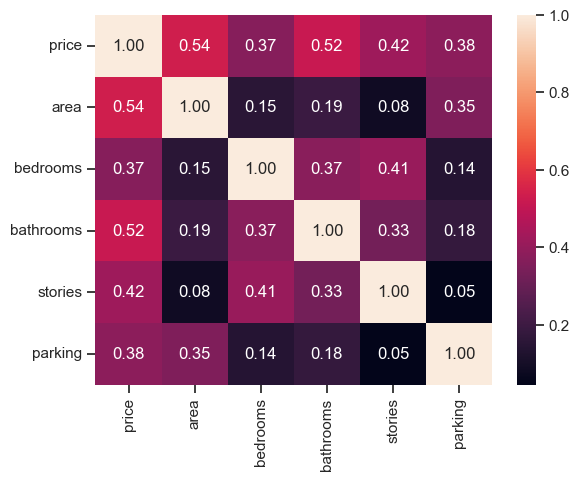

In [184]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")

As you can see the `area` and `price` of the house slightly correlate, which is seems as an obvious characteristic. More interesting feature seems to be, that `bathrooms` also correlate with `price` almost as good as an `area`.

#### Now let's do some EDA and visualize data from our dataset

In [185]:
df = data.copy()

C:\Users\tadno\AppData\Local\Temp\ipykernel_19124\1761412196.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




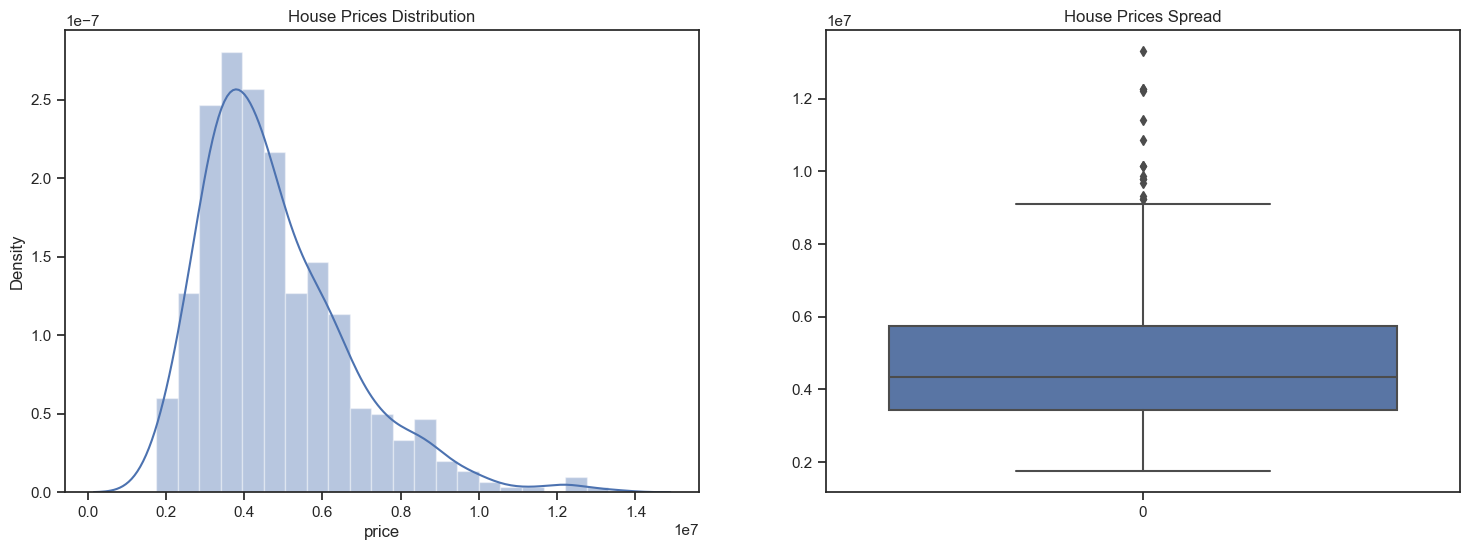

In [186]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.title('House Prices Distribution')
sns.distplot(df.price)

plt.subplot(1, 2, 2)
sns.boxplot(df.price)
plt.title('House Prices Spread')

plt.show()

#### Let's visualize categorical data now

In [187]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

<Axes: xlabel='guestroom', ylabel='price'>

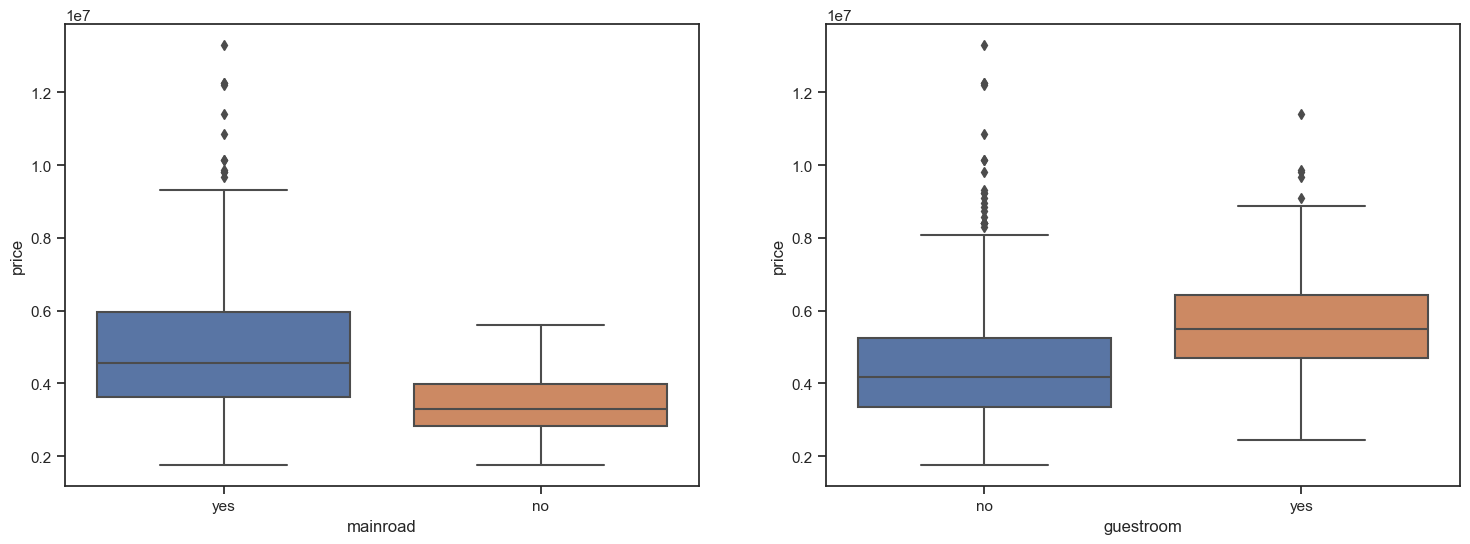

In [188]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="mainroad", y="price",
             data={'price': df.price, 'mainroad': df.mainroad})

plt.subplot(1, 2, 2)
sns.boxplot(x="guestroom", y="price",
             data={'price': df.price, 'guestroom': df.guestroom})

<Axes: xlabel='hotwaterheating', ylabel='price'>

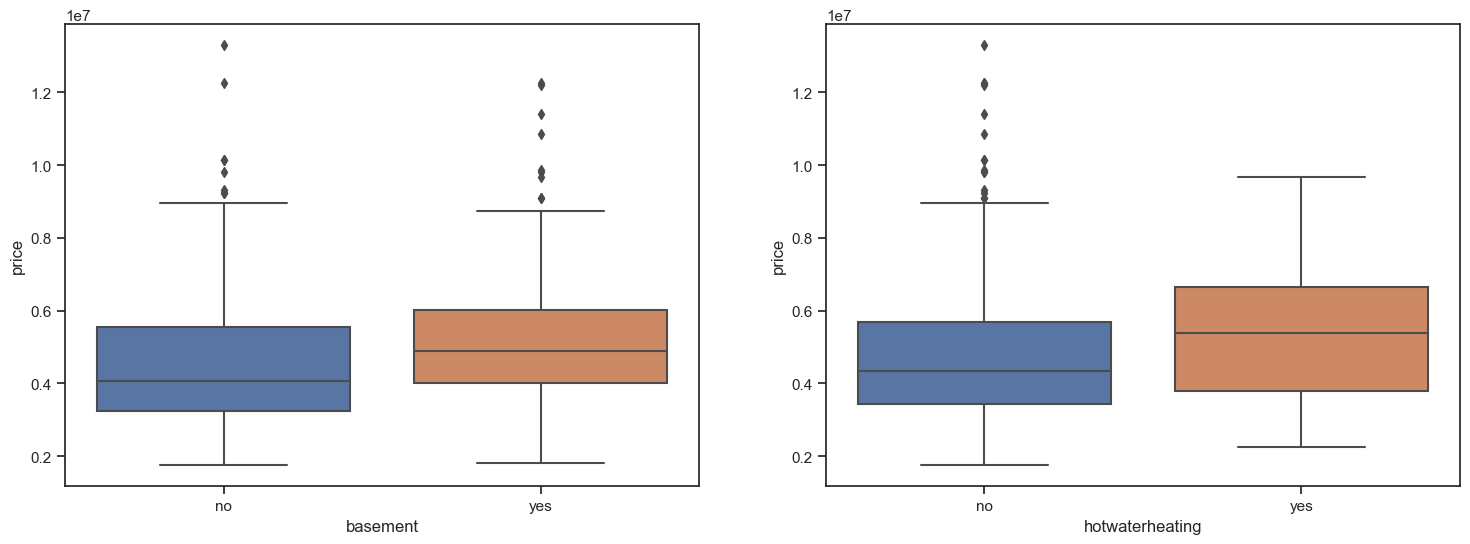

In [189]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="basement", y="price",
             data={'price': df.price, 'basement': df.basement})

plt.subplot(1, 2, 2)
sns.boxplot(x="hotwaterheating", y="price",
             data={'price': df.price, 'hotwaterheating': df.hotwaterheating})

<Axes: xlabel='furnishingstatus', ylabel='price'>

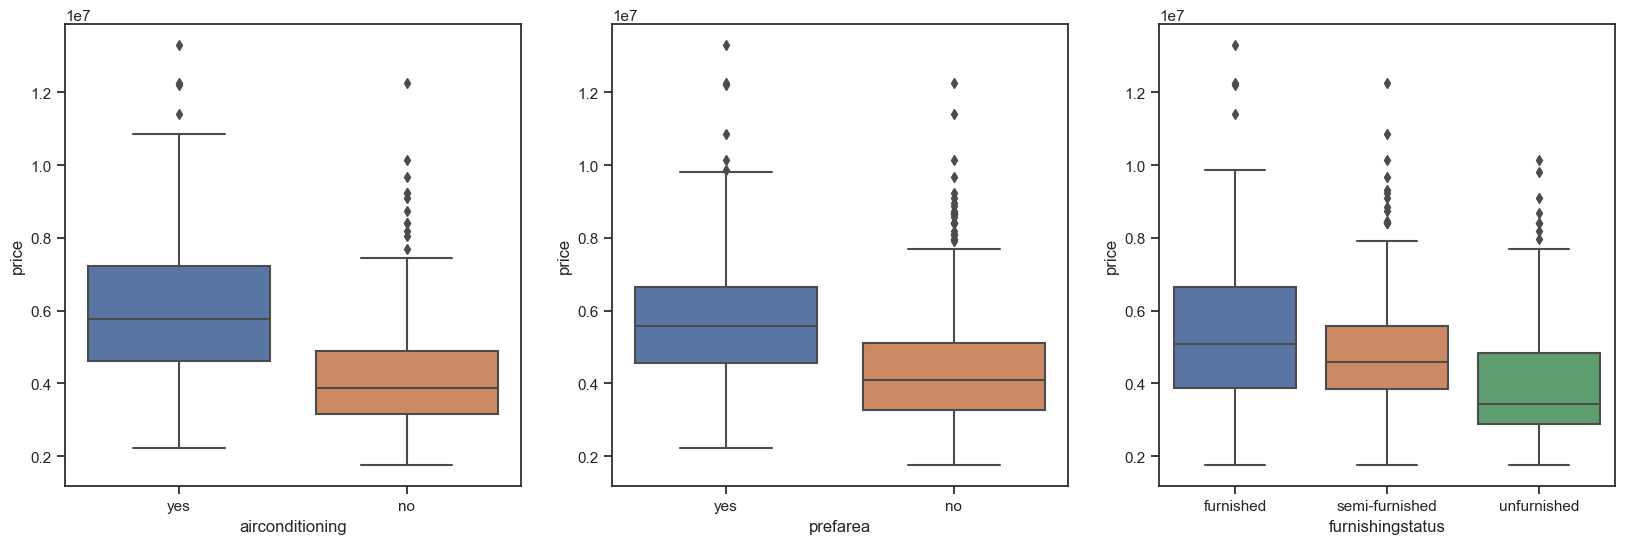

In [190]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x="airconditioning", y="price",
             data={'price': df.price, 'airconditioning': df.airconditioning})

plt.subplot(1, 3, 2)
sns.boxplot(x="prefarea", y="price",
             data={'price': df.price, 'prefarea': df.prefarea})

plt.subplot(1, 3, 3)
sns.boxplot(x="furnishingstatus", y="price",
             data={'price': df.price, 'furnishingstatus': df.furnishingstatus})

Now let's look at the amount of categorical data, which has `yes` or `no` values, but also `furnished`, `semi-furnished` or `not-furnished` in column of `furnishingstatus`

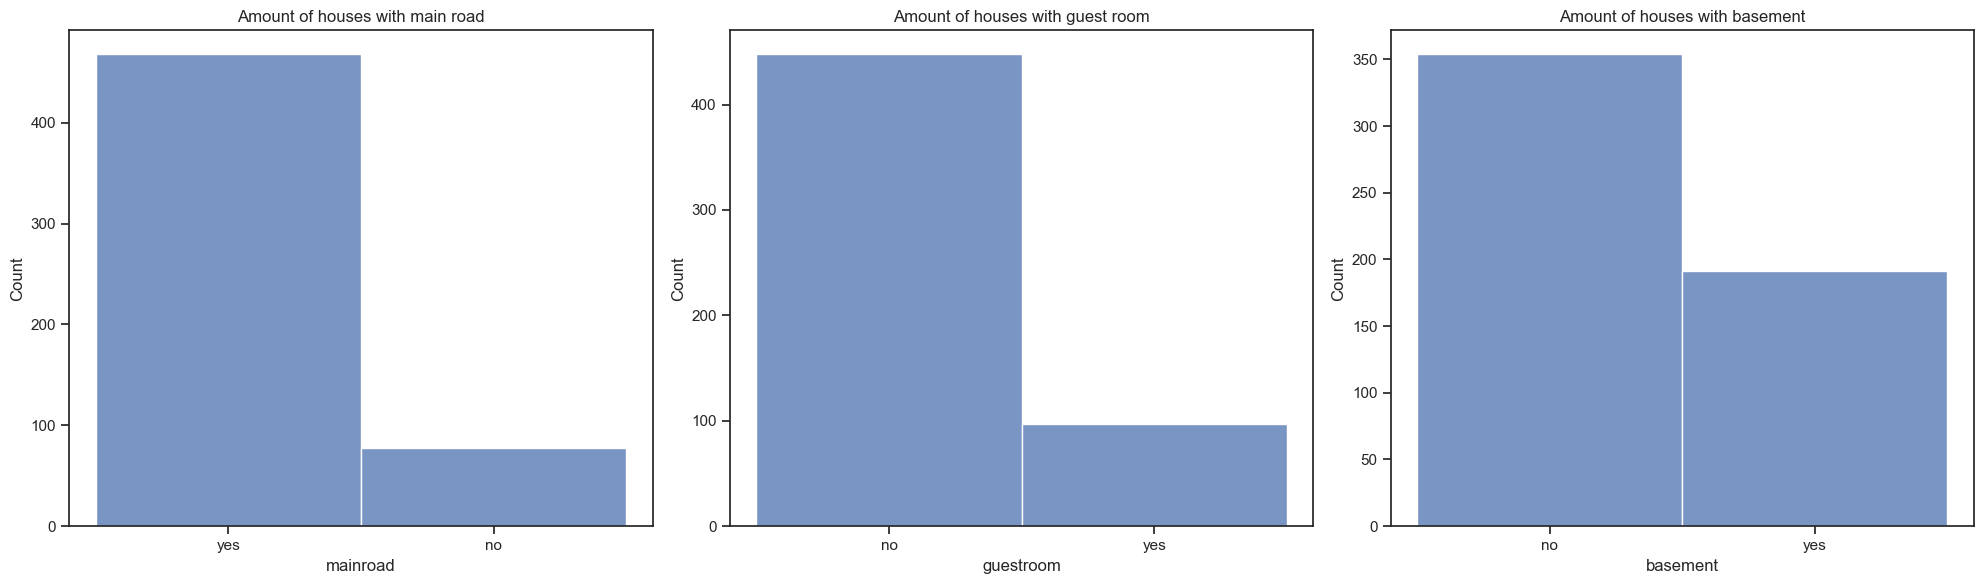

In [191]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) 

sns.histplot(data=df, x='mainroad', ax=axes[0])
axes[0].set_title('Amount of houses with main road')

sns.histplot(data=df, x='guestroom', ax=axes[1])
axes[1].set_title('Amount of houses with guest room')

sns.histplot(data=df, x='basement', ax=axes[2])
axes[2].set_title('Amount of houses with basement')

plt.tight_layout()
plt.show()

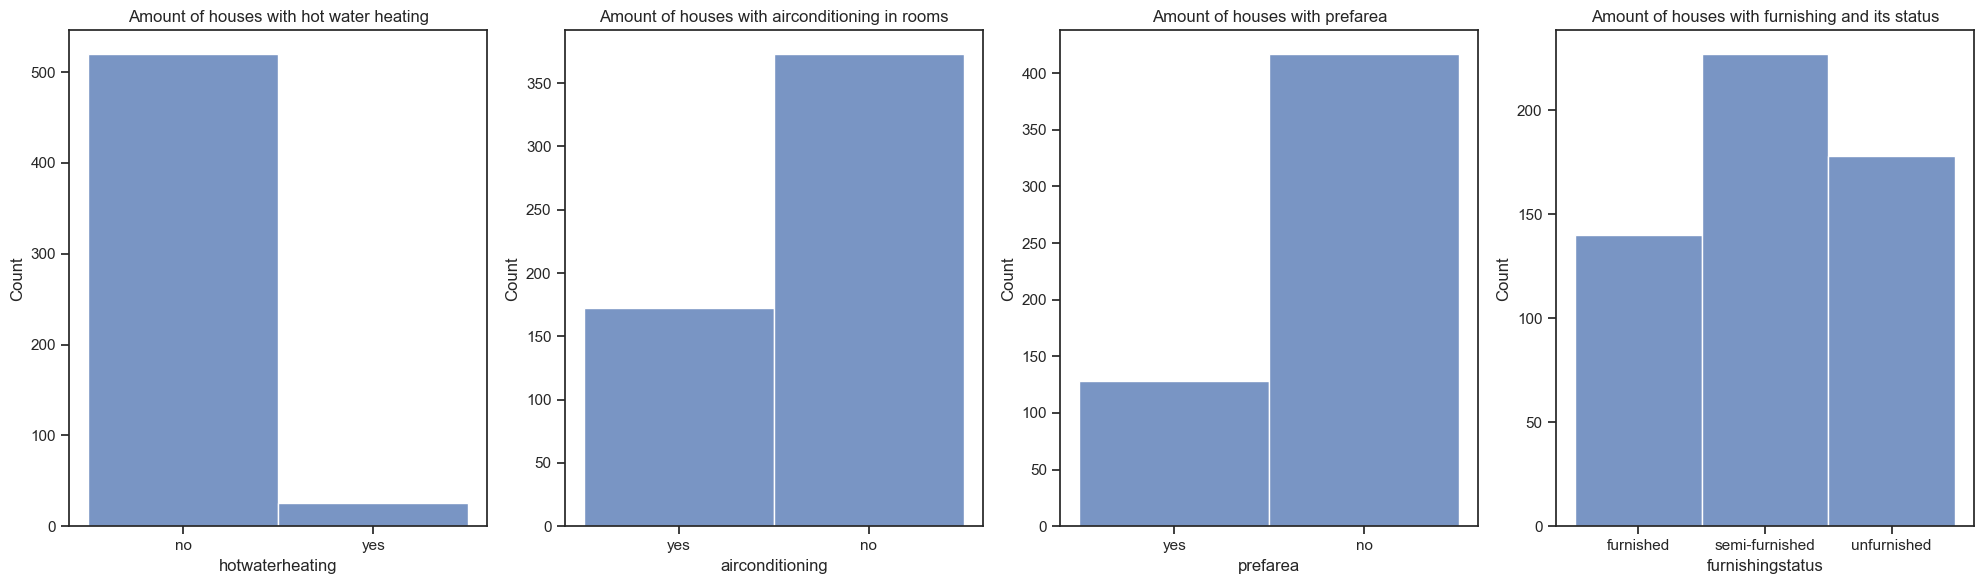

In [192]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6)) 

sns.histplot(data=df, x='hotwaterheating', ax=axes[0])
axes[0].set_title('Amount of houses with hot water heating')

sns.histplot(data=df, x='airconditioning', ax=axes[1])
axes[1].set_title('Amount of houses with airconditioning in rooms')

sns.histplot(data=df, x='prefarea', ax=axes[2])
axes[2].set_title('Amount of houses with prefarea')

sns.histplot(data=df, x='furnishingstatus', ax=axes[3])
axes[3].set_title('Amount of houses with furnishing and its status')

plt.tight_layout()
plt.show()

#### Let's visualize numerical data

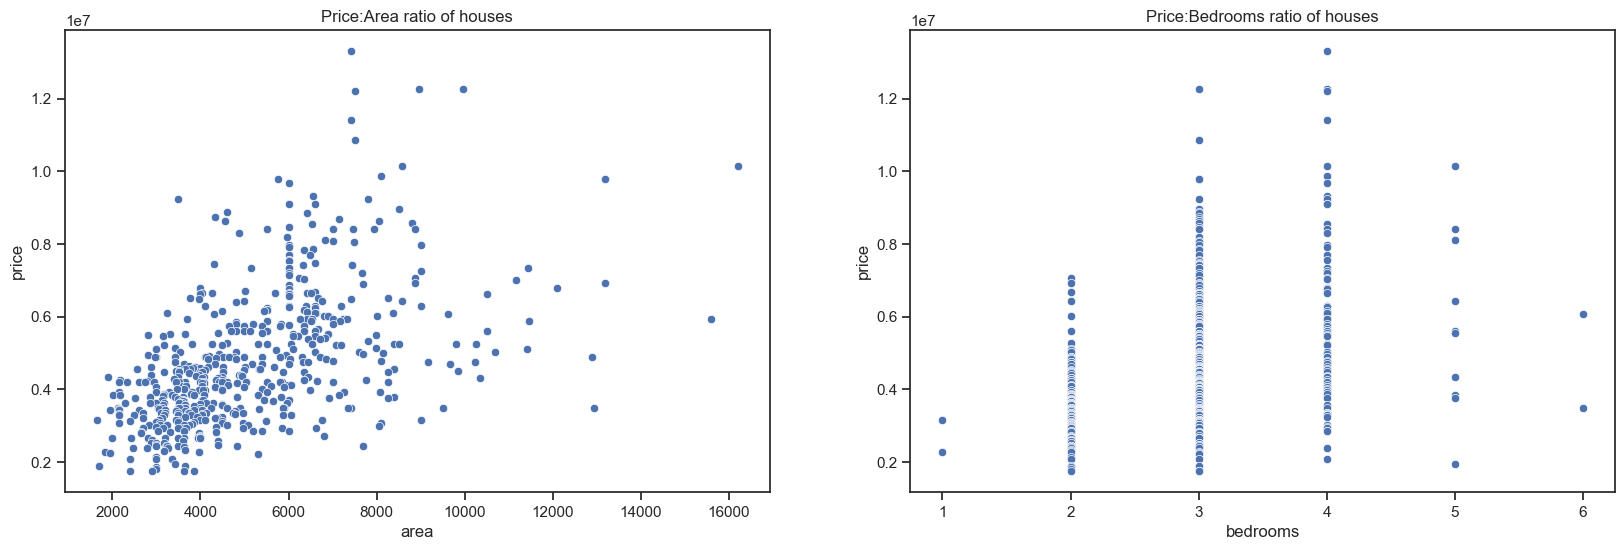

In [193]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt1 = sns.scatterplot(data=df, x="area", y="price").set_title('Price:Area ratio of houses')

plt.subplot(1, 2, 2)
plt2 = sns.scatterplot(data=df, x="bedrooms", y="price").set_title('Price:Bedrooms ratio of houses')

Text(0.5, 1.0, 'Price:Stories ratio in houses')

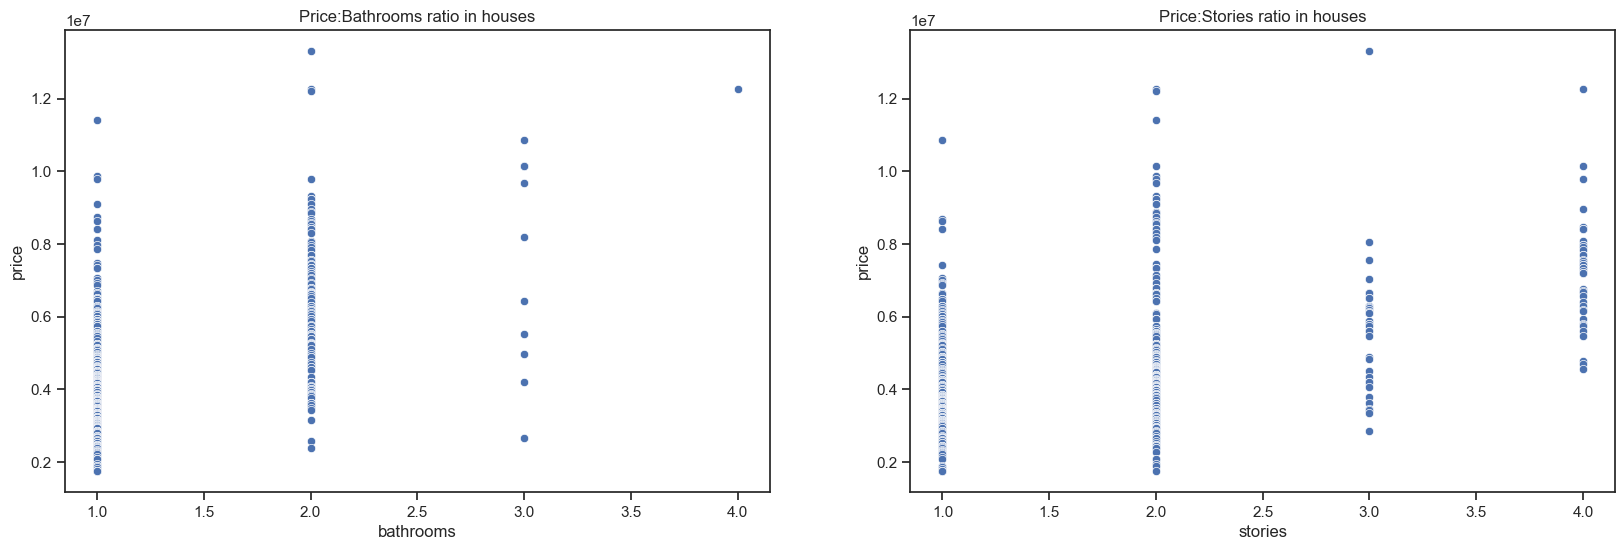

In [194]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='bathrooms', y='price').set_title('Price:Bathrooms ratio in houses')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='stories', y='price').set_title('Price:Stories ratio in houses')

Text(0.5, 1.0, 'Price:Parking lot ratio in houses')

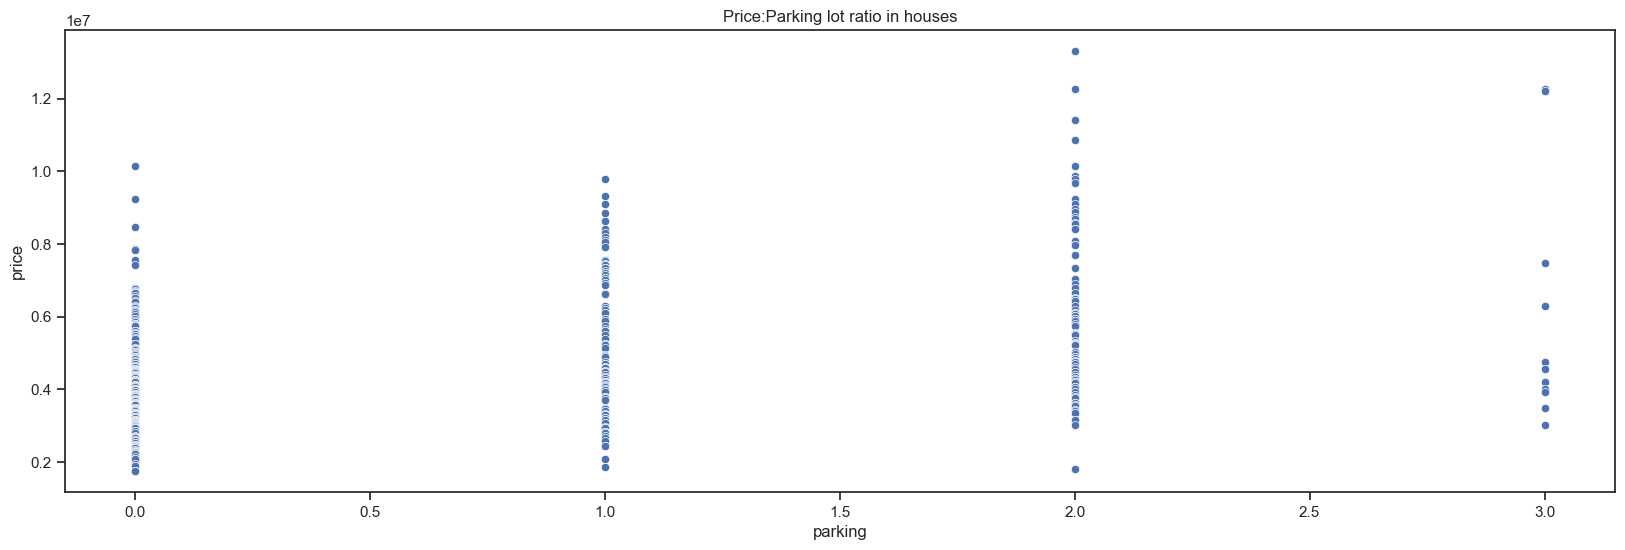

In [195]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='parking', y='price').set_title('Price:Parking lot ratio in houses')

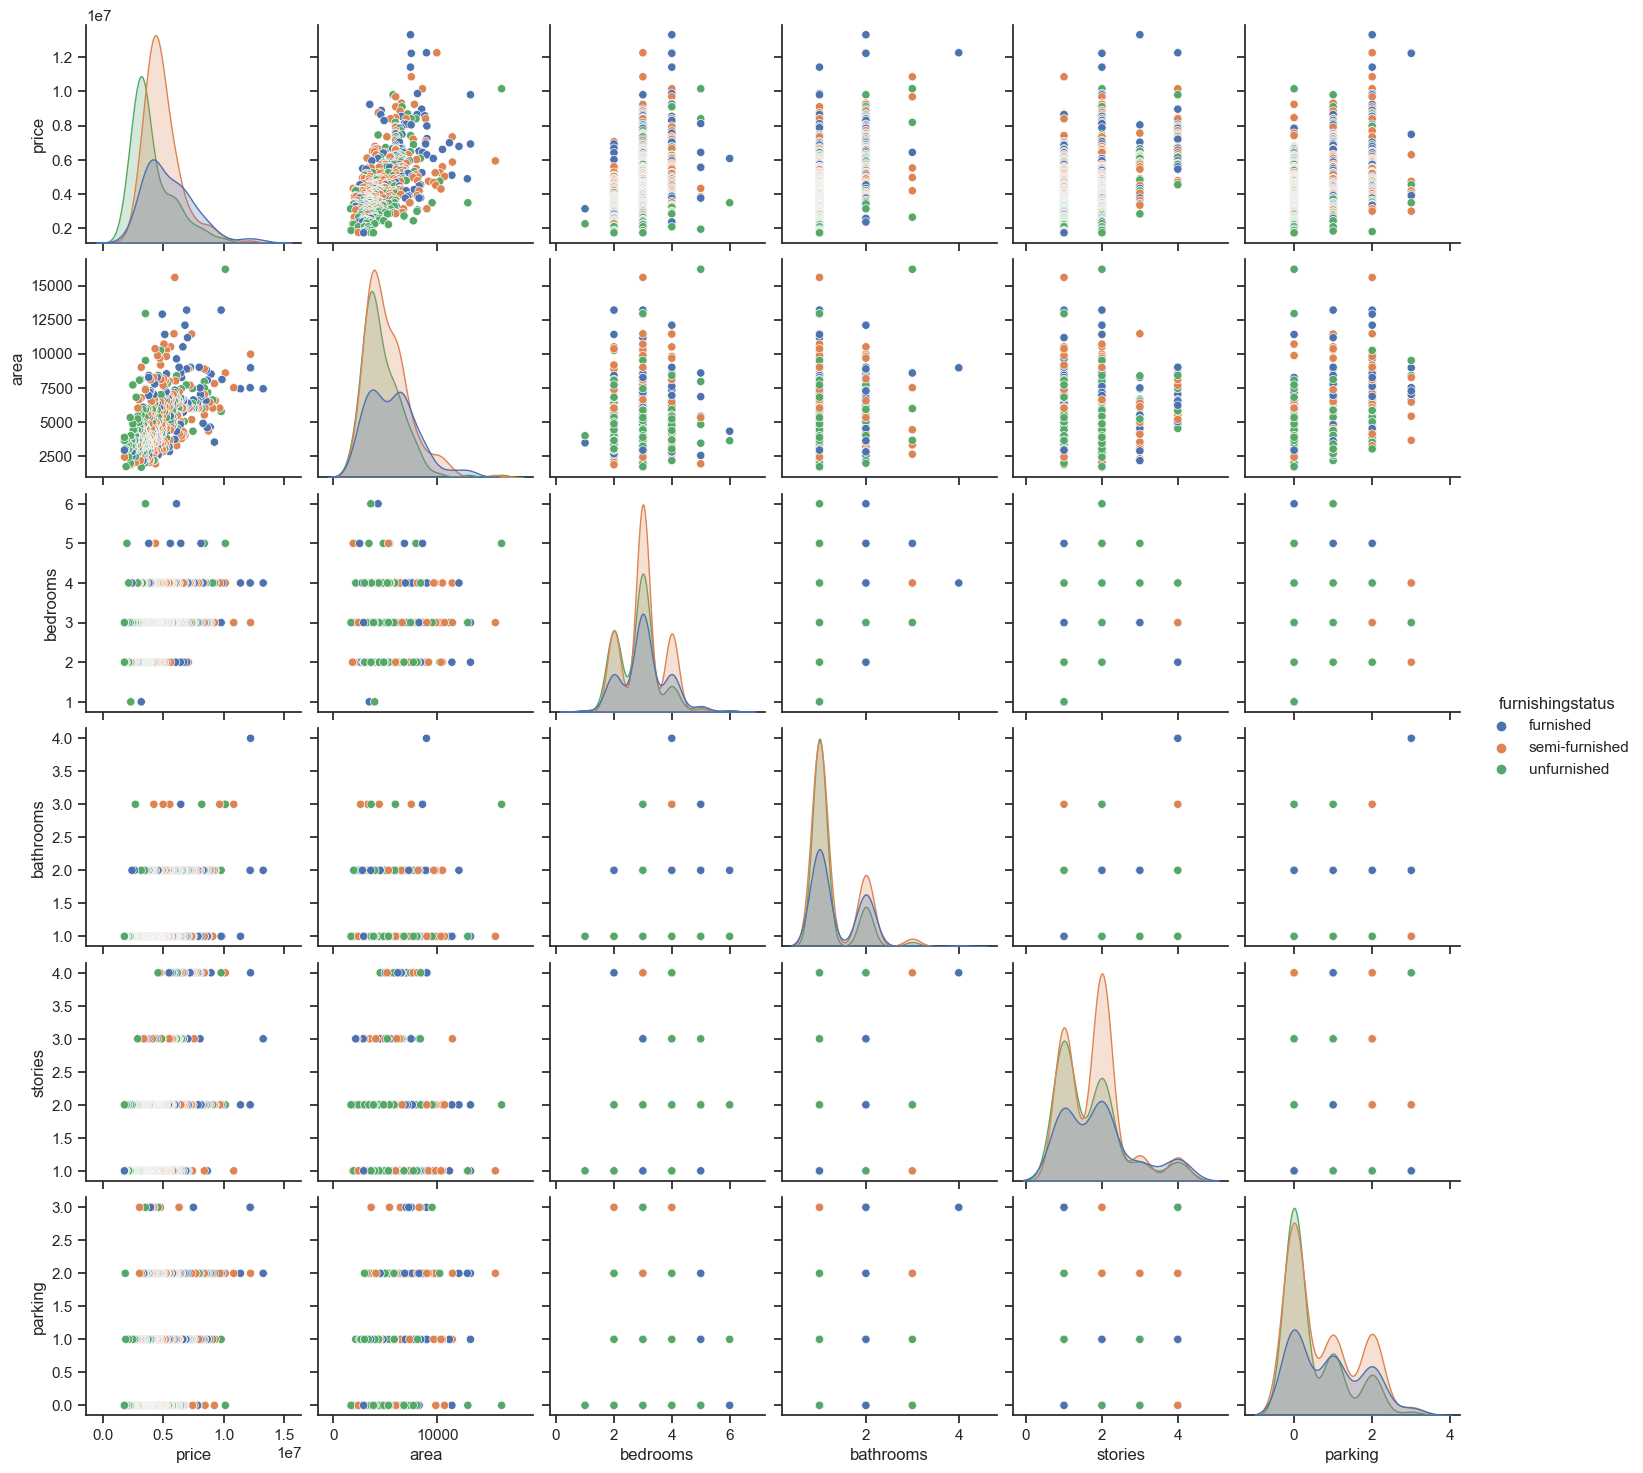

In [196]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue='furnishingstatus')

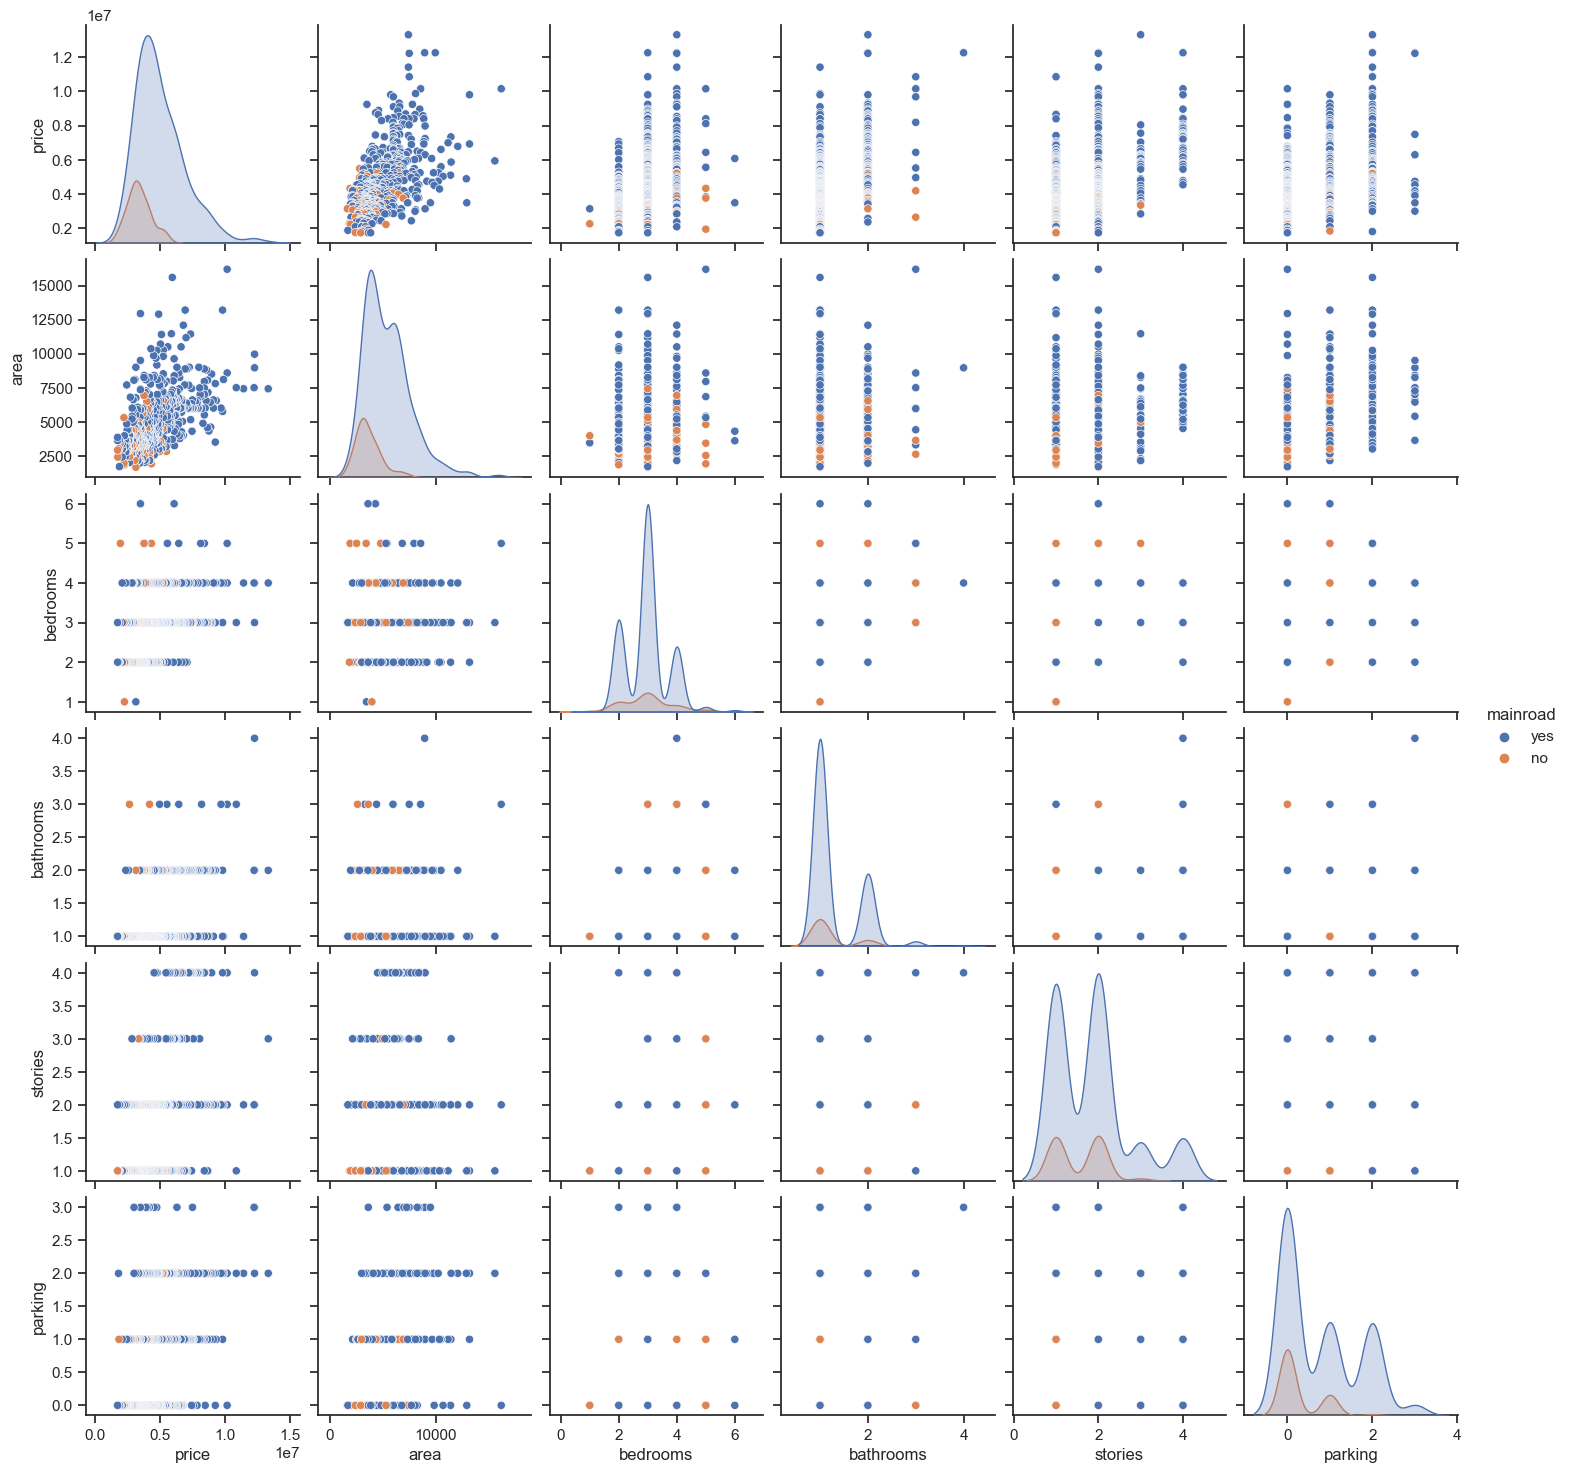

In [197]:
sns.pairplot(df, hue='mainroad')

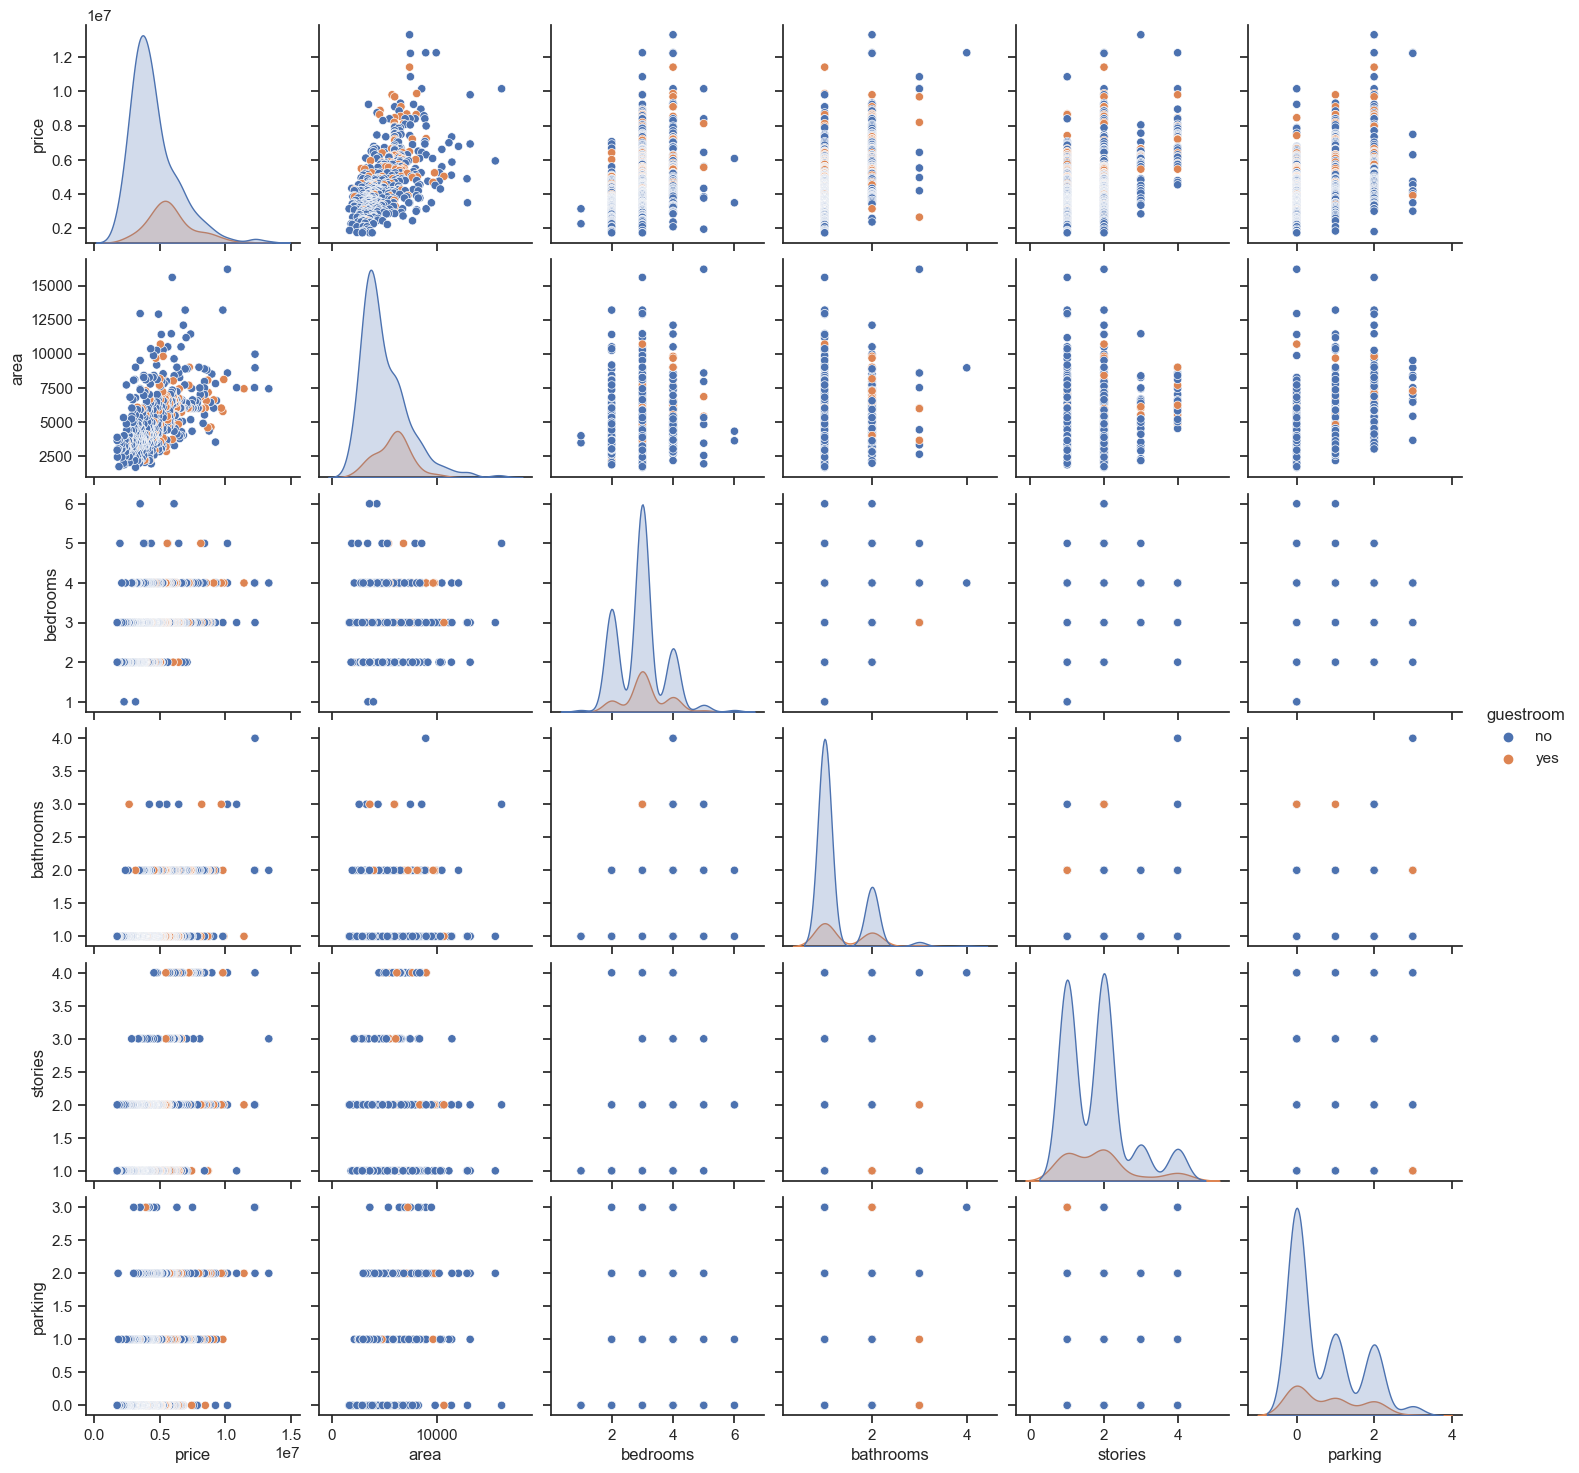

In [198]:
sns.pairplot(df, hue='guestroom')

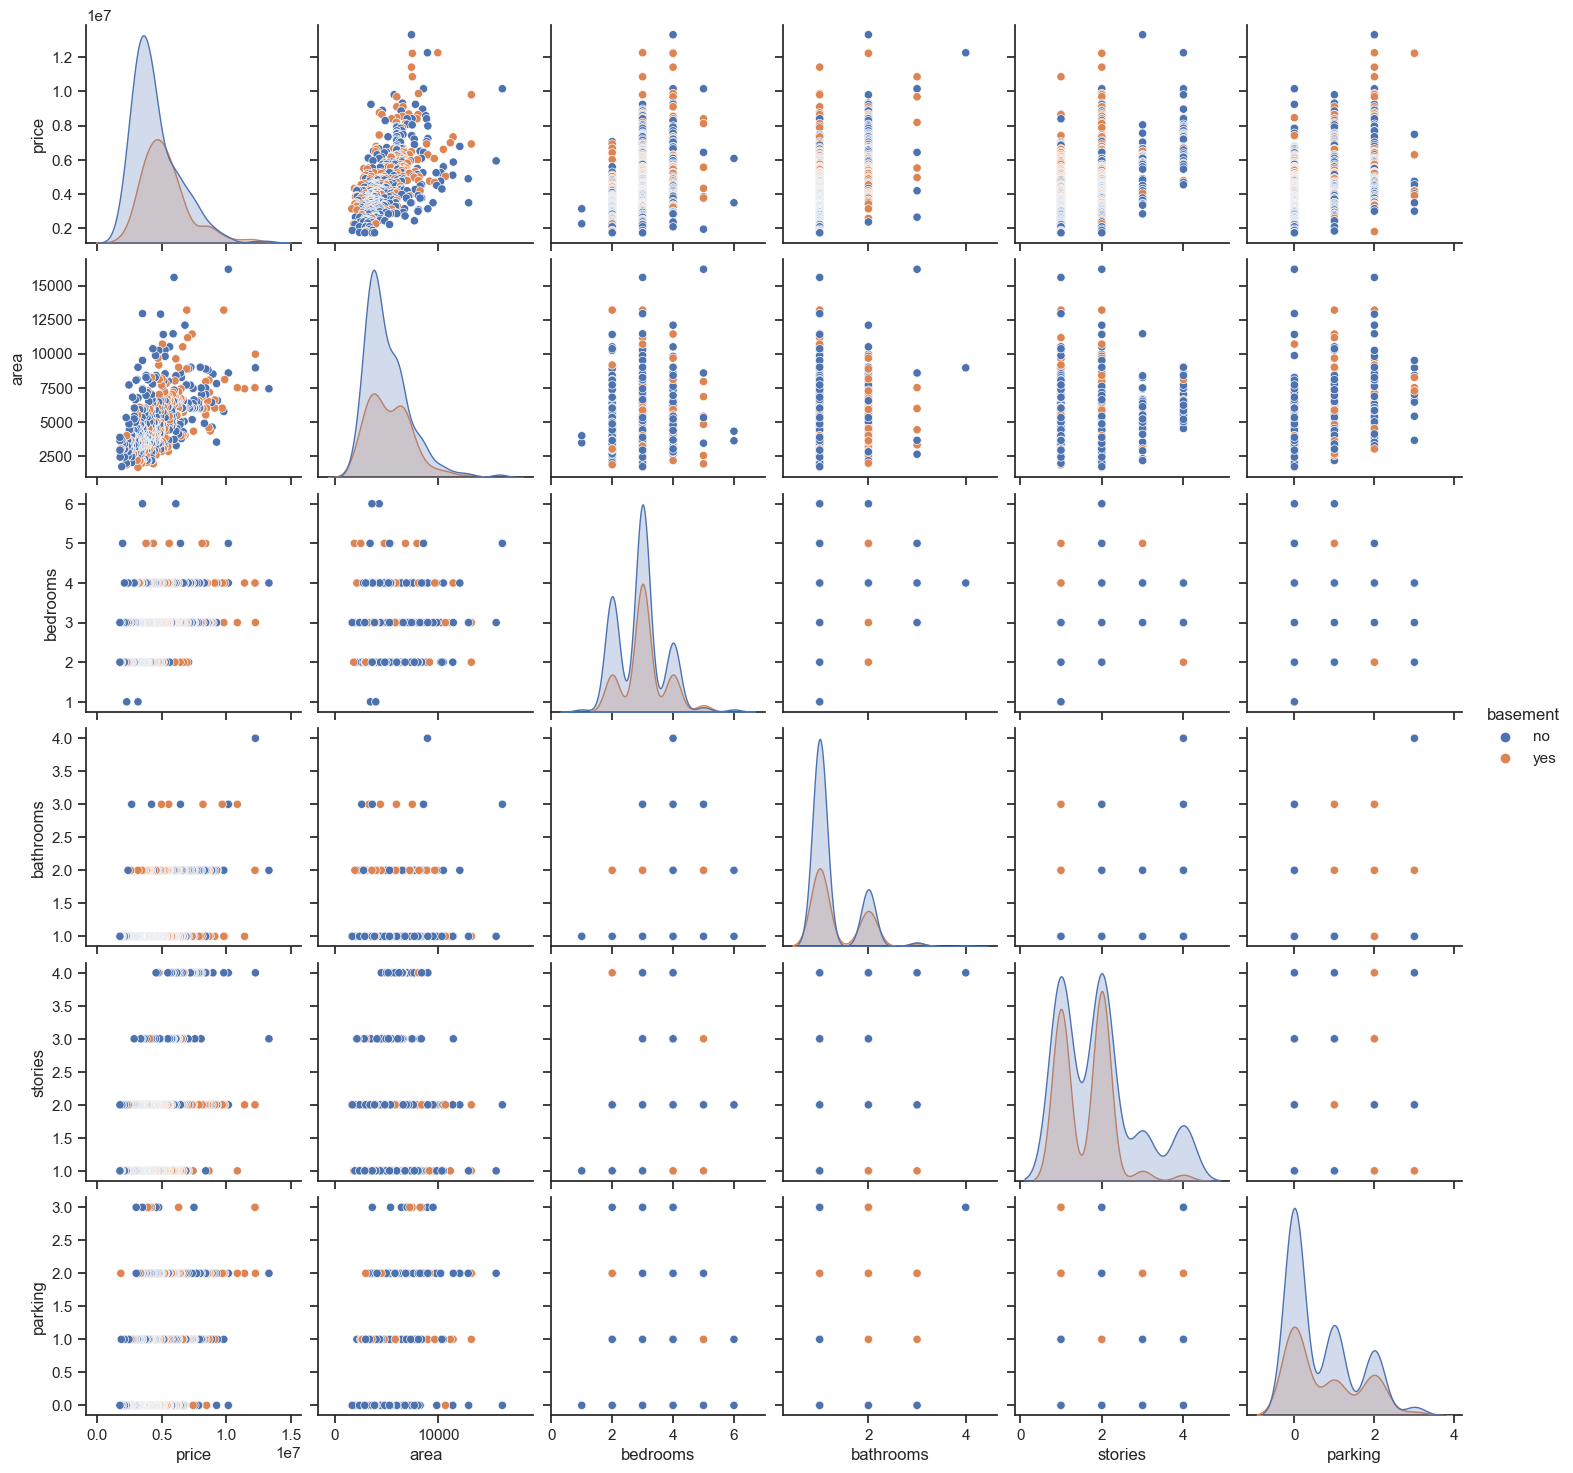

In [199]:
sns.pairplot(df, hue='basement')

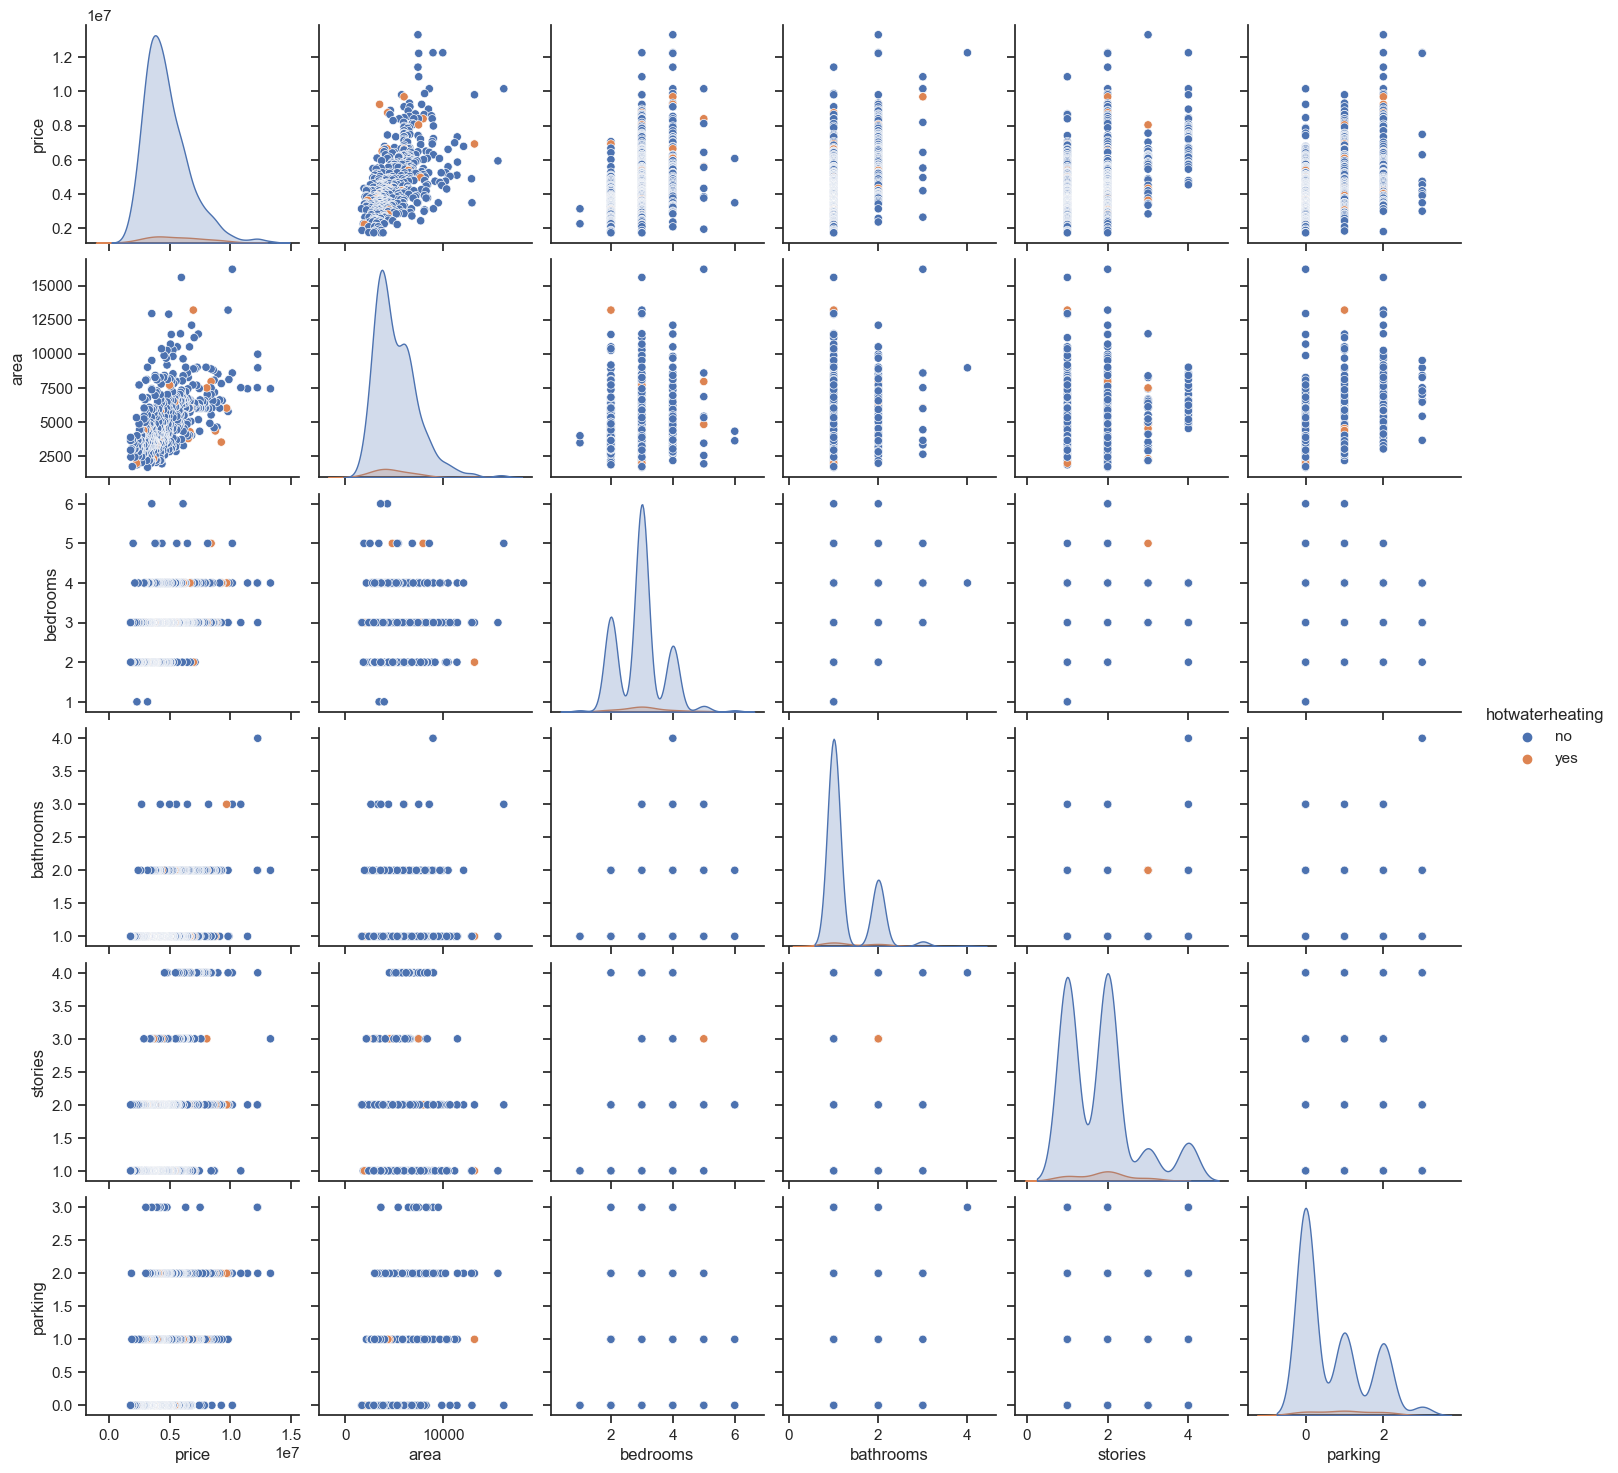

In [200]:
sns.pairplot(df, hue='hotwaterheating')

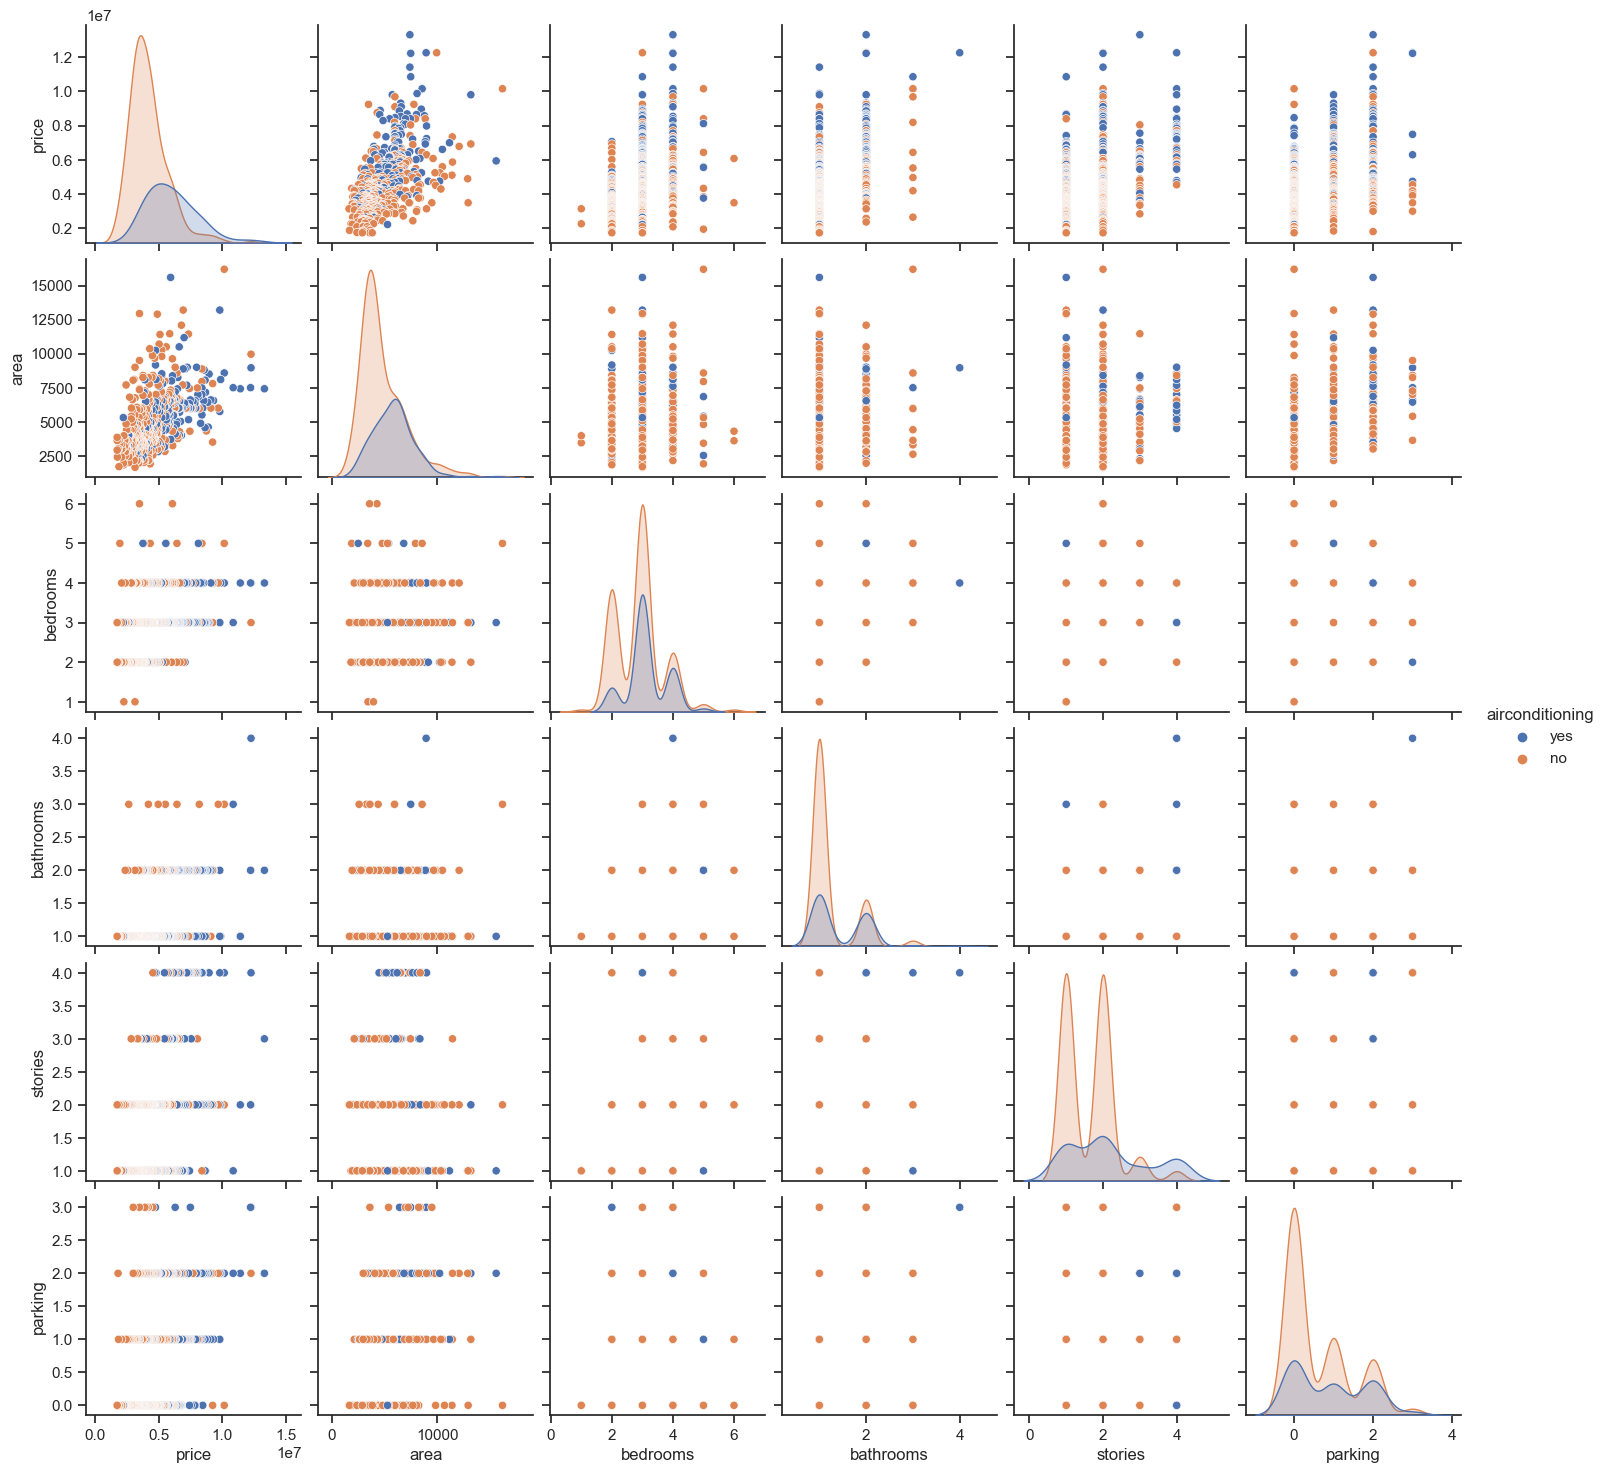

In [201]:
sns.pairplot(df, hue='airconditioning')

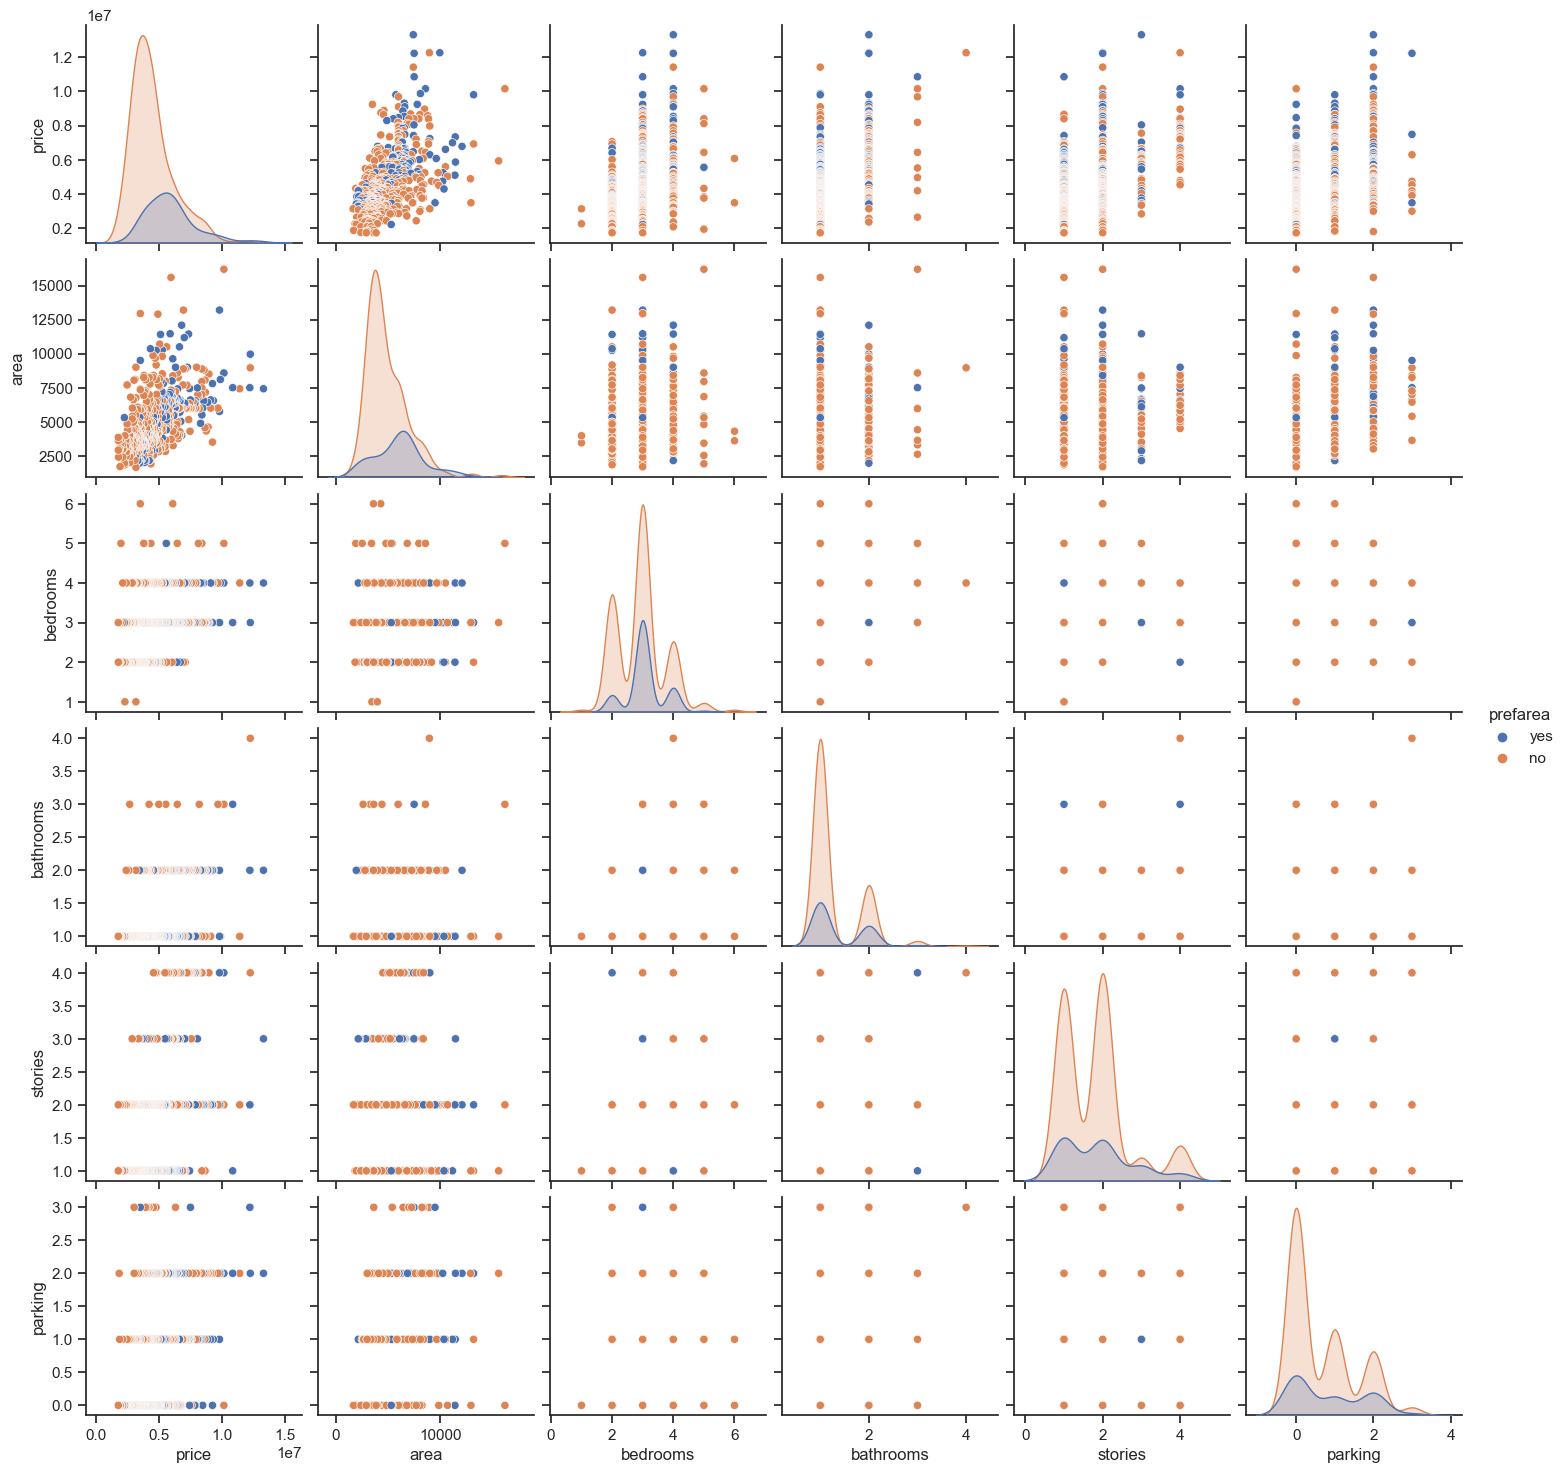

In [202]:
sns.pairplot(df, hue='prefarea')

### Prediction of housing prices using regression methods

#### Encoding categorical data

In [203]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [204]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4, 5, 6, 7, 8, 10, 11])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#### Splitting data into training and test subsets

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Training the multiple regression model on training set

In [206]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression()

#### Predicting house prices based on trained regression model

In [207]:
y_pred_lin = lin_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred_lin.reshape(len(y_pred_lin), 1)), 1))

[[ 4585000.    3950288.62]
 [ 6083000.    6173868.82]
 [ 4007500.    4483635.99]
 [ 6930000.    7258732.75]
 [ 2940000.    2836727.58]
 [ 6195000.    7032947.1 ]
 [ 3535000.    3203851.47]
 [ 2940000.    3270994.01]
 [ 3500000.    3472554.04]
 [ 7980000.    8289978.33]
 [ 6755000.    6605321.63]
 [ 3990000.    3723366.24]
 [ 3150000.    3812376.96]
 [ 3290000.    4548966.85]
 [ 4130000.    4020476.35]
 [ 2660000.    1969836.22]
 [ 4410000.    4057262.98]
 [ 3710000.    3704586.87]
 [ 3360000.    3282767.93]
 [ 4270000.    4609423.65]
 [ 5005000.    5968243.74]
 [ 5383000.    6363698.62]
 [ 6440000.    4751300.32]
 [ 1890000.    2659595.28]
 [ 6125000.    5305573.25]
 [ 5460000.    5680819.59]
 [ 5803000.    5404106.9 ]
 [ 4620000.    5543050.52]
 [ 5530000.    5768360.48]
 [ 5950000.    5801753.71]
 [ 4305000.    3389277.96]
 [ 3640000.    6399092.03]
 [ 5250000.    7081030.31]
 [ 3325000.    2913042.4 ]
 [ 3703000.    4498664.01]
 [ 4753000.    5210561.68]
 [ 9100000.    5013457.84]
 

#### Model performance evaluation

In [208]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lin)

0.6611214250980113

In [209]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

MAE: 716231.118974883
MSE: 976484771024.608
RMSE: 988172.4399236239


#### Let's try random forest regression

In [210]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=10, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

#### Predicting house prices based on trained random forest regression model

In [211]:
y_pred_rf = rf_regressor.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred_rf.reshape(len(y_pred_rf), 1)), 1))

[[ 4585000.  4369400.]
 [ 6083000.  6140400.]
 [ 4007500.  4655000.]
 [ 6930000.  6605200.]
 [ 2940000.  3004750.]
 [ 6195000.  7051800.]
 [ 3535000.  3146675.]
 [ 2940000.  3768100.]
 [ 3500000.  3544800.]
 [ 7980000.  7602000.]
 [ 6755000.  6068300.]
 [ 3990000.  3496500.]
 [ 3150000.  4378500.]
 [ 3290000.  5031600.]
 [ 4130000.  4933600.]
 [ 2660000.  2187500.]
 [ 4410000.  4329500.]
 [ 3710000.  4873400.]
 [ 3360000.  3479000.]
 [ 4270000.  3944500.]
 [ 5005000.  6979000.]
 [ 5383000.  6568100.]
 [ 6440000.  4567500.]
 [ 1890000.  2338000.]
 [ 6125000.  6215300.]
 [ 5460000.  4885300.]
 [ 5803000.  5683300.]
 [ 4620000.  5257000.]
 [ 5530000.  4412100.]
 [ 5950000.  5958400.]
 [ 4305000.  3628800.]
 [ 3640000.  5101250.]
 [ 5250000.  6867000.]
 [ 3325000.  3229800.]
 [ 3703000.  5397000.]
 [ 4753000.  4021500.]
 [ 9100000.  5910800.]
 [ 3500000.  3824100.]
 [ 3150000.  3467800.]
 [ 4270000.  4088000.]
 [ 8960000.  8438094.]
 [ 4060000.  6569500.]
 [ 5740000.  6543250.]
 [ 3129000.

#### Model performance evaluation

In [212]:
r2_score(y_test, y_pred_rf)

0.551917541419373

In [213]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 857450.1009174312
MSE: 1291157746085.8806
RMSE: 1136291.2241524532


#### Let's try Decision tree regression

In [214]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

#### Predicting house prices based on trained decision tree regression model

In [215]:
y_pred_dt = dt_regressor.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred_dt.reshape(len(y_pred_dt), 1)), 1))

[[ 4585000.  4907000.]
 [ 6083000.  5873000.]
 [ 4007500.  5145000.]
 [ 6930000.  5600000.]
 [ 2940000.  2940000.]
 [ 6195000.  6650000.]
 [ 3535000.  3430000.]
 [ 2940000.  4193000.]
 [ 3500000.  5250000.]
 [ 7980000.  6790000.]
 [ 6755000.  5775000.]
 [ 3990000.  3500000.]
 [ 3150000.  4473000.]
 [ 3290000.  4480000.]
 [ 4130000.  4480000.]
 [ 2660000.  2100000.]
 [ 4410000.  4319000.]
 [ 3710000.  4480000.]
 [ 3360000.  3640000.]
 [ 4270000.  3640000.]
 [ 5005000.  5250000.]
 [ 5383000.  9681000.]
 [ 6440000.  5740000.]
 [ 1890000.  2100000.]
 [ 6125000.  6510000.]
 [ 5460000.  6405000.]
 [ 5803000.  5229000.]
 [ 4620000.  5810000.]
 [ 5530000.  4767000.]
 [ 5950000.  5110000.]
 [ 4305000.  3605000.]
 [ 3640000.  4900000.]
 [ 5250000.  5950000.]
 [ 3325000.  3423000.]
 [ 3703000.  3640000.]
 [ 4753000.  5950000.]
 [ 9100000.  6020000.]
 [ 3500000.  3640000.]
 [ 3150000.  2660000.]
 [ 4270000.  4200000.]
 [ 8960000.  8575000.]
 [ 4060000.  5250000.]
 [ 5740000.  5740000.]
 [ 3129000.

#### Model performance evaluation

In [216]:
r2_score(y_test, y_pred_dt)

0.30716046750026493

In [217]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

MAE: 985779.8165137614
MSE: 1996429701834.8623
RMSE: 1412950.7075035782


#### Let's try Support Vector Regression (SVR)

#### Feature Scaling

In [218]:
from sklearn.preprocessing import StandardScaler
y_svr = y_train.reshape(len(y_train),1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_svr = sc_X.fit_transform(X_train)
y_svr = sc_y.fit_transform(y_svr)

#### Training the SVR model on the whole dataset

In [219]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel = 'rbf')
sv_regressor.fit(X_train_svr, y_svr)

C:\Users\tadno\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

#### Predicting house prices based on trained support vector regression model

In [220]:
y_pred_svr = sc_y.inverse_transform(sv_regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred_svr.reshape(len(y_pred_svr), 1)), 1))

[[ 4585000.    3912335.96]
 [ 6083000.    6259503.8 ]
 [ 4007500.    4046872.61]
 [ 6930000.    5779091.99]
 [ 2940000.    3179226.84]
 [ 6195000.    6885488.2 ]
 [ 3535000.    3536058.63]
 [ 2940000.    3120252.96]
 [ 3500000.    3412351.84]
 [ 7980000.    8126863.47]
 [ 6755000.    6374431.11]
 [ 3990000.    3834613.46]
 [ 3150000.    4166073.17]
 [ 3290000.    5397971.75]
 [ 4130000.    4663754.19]
 [ 2660000.    2662073.57]
 [ 4410000.    4251577.9 ]
 [ 3710000.    4096776.74]
 [ 3360000.    3561189.66]
 [ 4270000.    4214584.95]
 [ 5005000.    5523307.34]
 [ 5383000.    6307066.25]
 [ 6440000.    4470800.43]
 [ 1890000.    2880915.86]
 [ 6125000.    5777239.5 ]
 [ 5460000.    6458146.9 ]
 [ 5803000.    5622159.63]
 [ 4620000.    5699356.56]
 [ 5530000.    4688037.5 ]
 [ 5950000.    5683527.48]
 [ 4305000.    3503191.35]
 [ 3640000.    5768364.39]
 [ 5250000.    7210092.17]
 [ 3325000.    2995316.57]
 [ 3703000.    4788075.74]
 [ 4753000.    4283457.64]
 [ 9100000.    4316344.2 ]
 

#### Model performance evaluation

In [221]:
r2_score(y_test, y_pred_svr)

0.6045259725327574

In [222]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_svr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

MAE: 714540.8449218499
MSE: 1139565595934.2378
RMSE: 1067504.3774777872


### Conclusion

So the end result shows, that the `Support Vector Regression` is the most suitable for this dataset for predicting house prices based on its characteristics